In [1]:
import numpy as np
import pandas as pd
import os as os
import csv, sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.weightstats as st
from scipy import stats

In [2]:
input_file_name = input("Please input file name：ECQ_D.csv: ")  ## Enter key to confirm input

Please input file name：ECQ_D.csv: ECQ_D.csv


In [3]:
os.chdir(r"C:\\Users\laura\Desktop\论文\Python\AI_model\ECQ_10_years_PA7")# You may change the path accordingly
subset_varible=["SEQN","ECD010","ECQ020","ECQ060","ECD070A","MCQ080E","WHQ030E"]  # Filter specified variables

In [4]:
data=pd.read_csv(input_file_name)
data1 = data[subset_varible]

In [5]:
data1 = data1[data1.ECD010 <= 60] ; data1 = data1[data1.ECQ060 <= 2]
data1 = data1[data1.ECD070A <= 20] ; data1 = data1[data1.WHQ030E <= 3]
data1 = data1[data1.MCQ080E <= 2] ; data1 = data1[data1.ECQ020 <= 2]#Remove abnormal data
data1 = data1.dropna() # 去除含有空值的行
print(data1.shape) #Check data dimensions
data1.head()

(3154, 7)


,SEQN,ECD010,ECQ020,ECQ060,ECD070A,MCQ080E,WHQ030E
1,31128.0,33.0,1.0,1.0,4.0,2.0,2.0
2,31129.0,19.0,2.0,2.0,6.0,2.0,3.0
4,31137.0,17.0,2.0,2.0,7.0,2.0,1.0
5,31138.0,21.0,2.0,2.0,7.0,2.0,3.0
6,31140.0,31.0,2.0,2.0,10.0,2.0,3.0


In [6]:
# connect function opens a connection to the SQLite database file, 
conn = sqlite3.connect('database.db')
#Similarly we will make connection with other databases like Oracle, DB2 etc.
print(conn)

In [7]:
# Drop a table name Crypto if it exists already
try:
    conn.execute('DROP TABLE IF EXISTS `tan2345` ')
except Exception as e:
    raise(e)
finally:
    print('Table dropped')

Table dropped


In [8]:
def create_table():
    conn = sqlite3.connect("database.db")
    try:
        create_tb_cmd='''
       create table tan2345(SEQN integer ,ECD010 integer,ECQ020 integer,ECQ060 integer,WHQ030E integer,ECD070A integer,MCQ080E integer);
        '''
        conn.execute(create_tb_cmd)
    except:
        print("Create table failed")
        return False
    #conn.execute(insert_dt_cmd)
    conn.commit()
create_table()

In [9]:
conn = sqlite3.connect("database.db")
cu=conn.cursor()
#Insert the newly fetched data into the database's table 
data1.to_sql('tan2345',conn, if_exists='append', index=False)  
conn.commit()

In [10]:
##Read the newest data from the database
conn = sqlite3.connect("database.db")
#print(conn)
sql="SELECT * from tan2345"
data2=pd.read_sql(sql,conn)
data2.head()

,SEQN,ECD010,ECQ020,ECQ060,WHQ030E,ECD070A,MCQ080E
0,31128,33,1,1,2,4,2
1,31129,19,2,2,3,6,2
2,31137,17,2,2,1,7,2
3,31138,21,2,2,3,7,2
4,31140,31,2,2,3,10,2


In [11]:
data2.columns = ["ID","Mother's age when born","Mother smoked when pregnant",
                   "Receive newborn care at health facility","How do you consider weight",
                   "Weight at birth, pounds","Doctor confirmed overweight"]
data2.head()

,ID,Mother's age when born,Mother smoked when pregnant,Receive newborn care at health facility,How do you consider weight,"Weight at birth, pounds",Doctor confirmed overweight
0,31128,33,1,1,2,4,2
1,31129,19,2,2,3,6,2
2,31137,17,2,2,1,7,2
3,31138,21,2,2,3,7,2
4,31140,31,2,2,3,10,2


### Statistical Analysis

In [28]:
subset_varible2=["ID","Mother's age when born","Mother smoked when pregnant","Weight at birth, pounds"]  # Filter specified variables
data3 = data2[subset_varible2].copy()
data3.head()

,ID,Mother's age when born,Mother smoked when pregnant,"Weight at birth, pounds"
0,31128,33,1,4
1,31129,19,2,6
2,31137,17,2,7
3,31138,21,2,7
4,31140,31,2,10


In [29]:
print('调查样本数为：%d' % data.shape[0])
print('剔除无效样本后，有效样本数为：%d' % data3.shape[0])

调查样本数为：4209
剔除无效样本后，有效样本数为：3154


吸烟母亲人数：429，占比：13.60%


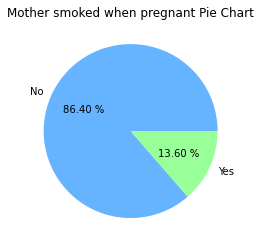

In [30]:
print('吸烟母亲人数：%d，占比：%3.2f%%' % (len(data3[data3['Mother smoked when pregnant']==1]),\
                                100 * len(data3[data3['Mother smoked when pregnant']==1]) / data3.shape[0]))
num_list = list(data3['Mother smoked when pregnant'].value_counts()) #获取列ECQ020数据
name_list = list(data3['Mother smoked when pregnant'].value_counts().index) #获取列ECQ020有哪些值
plt.axes(aspect = 1) #饼图类型
colors = ['#66b3ff','#99ff99']
plt.pie(x = num_list, labels = ['No', 'Yes'],colors = colors, autopct = '%3.2f %%') #饼图
plt.title('Mother smoked when pregnant' + ' Pie Chart') #设置标题
plt.show()

In [31]:
data3.iloc[:, 1:5].describe()

,Mother's age when born,Mother smoked when pregnant,"Weight at birth, pounds"
count,3154.000000,3154.000000,3154.000000
mean,25.902980,1.863982,6.810399
std,6.053266,0.342862,1.414507
min,14.000000,1.000000,1.000000
25%,21.000000,2.000000,6.000000
50%,25.000000,2.000000,7.000000
75%,30.000000,2.000000,8.000000
max,44.000000,2.000000,13.000000


Text(0, 0.5, 'Weight at birth, pounds')

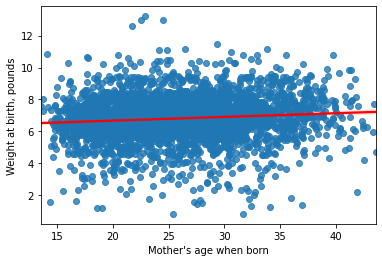

In [32]:
l = data3.shape[0] #Fetch the number of Rows
x = data3["Mother's age when born"].values + np.random.randint(-500, 500, l) / 1000
y = data3['Weight at birth, pounds'].values + np.random.randint(-500, 500, l) / 1000
sns.regplot(x=x, y=y,data=data3, line_kws={"color": "red"}) #spline curve 
plt.xlabel("Mother's age when born")
plt.ylabel("Weight at birth, pounds")

In [33]:
cor1 = data3.iloc[:, 1:4].corr(method='spearman')   # Calculate the correlation coefficient of 1 to 3 columns of variables
cor1

,Mother's age when born,Mother smoked when pregnant,"Weight at birth, pounds"
Mother's age when born,1.000000,0.027549,0.118228
Mother smoked when pregnant,0.027549,1.000000,0.075235
"Weight at birth, pounds",0.118228,0.075235,1.000000


In [34]:
cor2 = data3.iloc[:, 1:4].corr(method='kendall')   # Calculate the correlation coefficient of 1 to 3 columns of variables
cor2

,Mother's age when born,Mother smoked when pregnant,"Weight at birth, pounds"
Mother's age when born,1.000000,0.023006,0.089172
Mother smoked when pregnant,0.023006,1.000000,0.067588
"Weight at birth, pounds",0.089172,0.067588,1.000000


<AxesSubplot:>

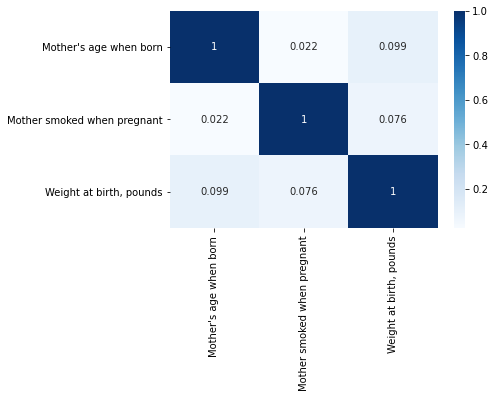

In [35]:
del data3['ID']
sns.heatmap(data3.corr(),annot = True,cmap="Blues")

In [36]:
#sns.heatmap(cor1,annot = True, square=False,cmap="Blues")

In [37]:
#sns.heatmap(cor2,annot = True, square=False,cmap="Blues")

In [47]:
smoke = data3[data3['Mother smoked when pregnant']==1]['Weight at birth, pounds'] #母亲吸烟婴儿体重
nosmoke = data3[data3['Mother smoked when pregnant']==2]['Weight at birth, pounds'] #母亲不吸烟婴儿体重
data4 = pd.concat([smoke.describe(), nosmoke.describe()],axis=1)
data4.columns=['Mother smoked when preganent','Mother not smoke when preganent']
data4.iloc[:, 0:3]

,Mother smoked when preganent,Mother not smoke when preganent
count,429.000000,2725.000000
mean,6.540793,6.852844
std,1.311823,1.425588
min,1.000000,1.000000
25%,6.000000,6.000000
50%,7.000000,7.000000
75%,7.000000,8.000000
max,11.000000,13.000000


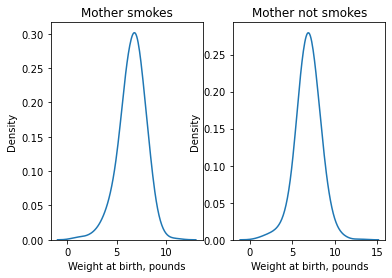

In [48]:
#View data set distribution
fig, axes = plt.subplots(ncols=2)
sns.kdeplot(smoke, legend=False, ax=axes[0], bw_method = 0.5)
sns.kdeplot(nosmoke, legend=False, ax=axes[1], bw_method = 0.5)

axes[0].set(title='Mother smokes')
axes[1].set(title='Mother not smokes')
plt.subplots_adjust(wspace=0.2)

In [55]:
W, levene_P = stats.levene(smoke, nosmoke, center='mean')
#print("Levene's方差齐性检验的W统计量为" + str(W))
print("Levene's方差齐性检验的P值为" + str(levene_P))

Levene's方差齐性检验的P值为0.5304084363609181


In [52]:
alpha = 0.05
if(levene_P < alpha):
    print("p<a, 方差不相等,建议使用Student t检验")
else:
    print("p>a, 方差相等,建议使用Welch T")

p>a, 方差相等,建议使用Welch T


In [53]:
t, p_two, df = st.ttest_ind(smoke, nosmoke)
print('t=' + str(t))
print('P-value=' + str(p_two))
print('Degree of freedom=' + str(df))
alpha = 0.05
if(p_two < alpha): 
    #print('P<α，Rejecting the null hypothesis, there is a significant difference in the average weight of newborn babies between mothers smoked during pregnancy and those who did not smoke during pregnancy.')
    print('P<α，拒绝原假设，母亲孕期吸烟和母亲孕期不吸烟的平均新生婴儿体重显著差异。')
else: 
    #print('P>α，The null hypothesis holds. There is no significant difference in the average newborn baby weight between mothers who smoke during pregnancy and those who do not smoke during pregnancy.')
    print('P>α，不能拒绝原假设，母亲孕期吸烟和母亲孕期不吸烟的平均新生婴儿体重无显著差异。')

t=-4.2587208374825645
P-value=2.116083306858783e-05
Degree of freedom=3152.0
P<α，拒绝原假设，母亲孕期吸烟和母亲孕期不吸烟的平均新生婴儿体重显著差异。


In [57]:
# scipy.stats.ttest_rel（a，b，axis = 0）
# from pingouin import welch_anova, read_dataset
# df = read_dataset('anova')
# aov = welch_anova(dv='Pain threshold', between='Hair color', data=df)
# aov